In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix,classification_report
from imblearn.metrics import sensitivity_specificity_support
from imblearn.metrics import sensitivity_score ,specificity_score
from sklearn.metrics import recall_score , accuracy_score ,precision_score,f1_score,roc_auc_score

In [3]:
data=pd.read_csv('hotel_bookings.csv',parse_dates=['reservation_status_date'])

In [3]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [5]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
## Country , Company ,Ageny ,children has null values
## Company has more then 90% null values so Company can be removed easily let us remove and check

data.drop('company',axis=1,inplace=True)

## after removing Company still children country and Ageny is having null values we will check them later

In [7]:
data['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

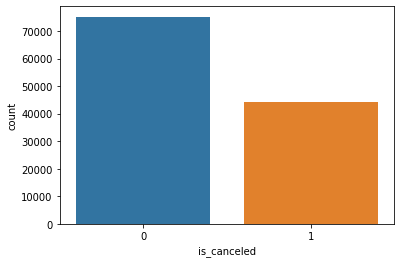

In [8]:
sns.countplot('is_canceled',data=data)

In [9]:
### Data is imbalanced

## 1.Hotel

In [10]:
data.groupby(['is_canceled','hotel'])['hotel'].count()

is_canceled  hotel       
0            City Hotel      46228
             Resort Hotel    28938
1            City Hotel      33102
             Resort Hotel    11122
Name: hotel, dtype: int64

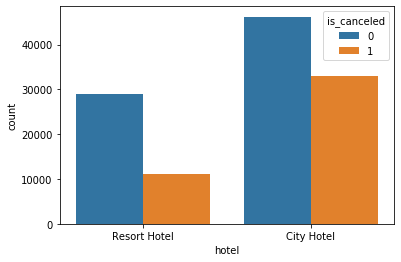

In [11]:
sns.countplot('hotel',data=data,hue='is_canceled')

In [12]:
### Resort Hotel has less ratio of cancelled Bookings

## 2. lead_time

[]

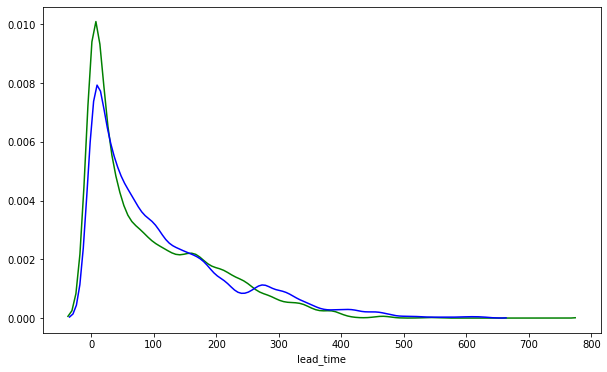

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(data[data['hotel']=="Resort Hotel"]['lead_time'],hist=False,color='green')
sns.distplot(data[data['hotel']=="City Hotel"]['lead_time'],hist=False,color='blue')
plt.plot()

### 3. arrival_date_year

[]

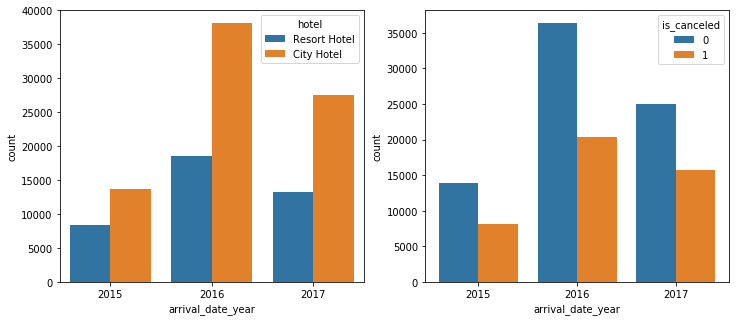

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot('arrival_date_year',data=data,hue='hotel')
plt.subplot(1,2,2)
sns.countplot('arrival_date_year',data=data,hue='is_canceled')
plt.plot()

### 4.arrival_date_month

[]

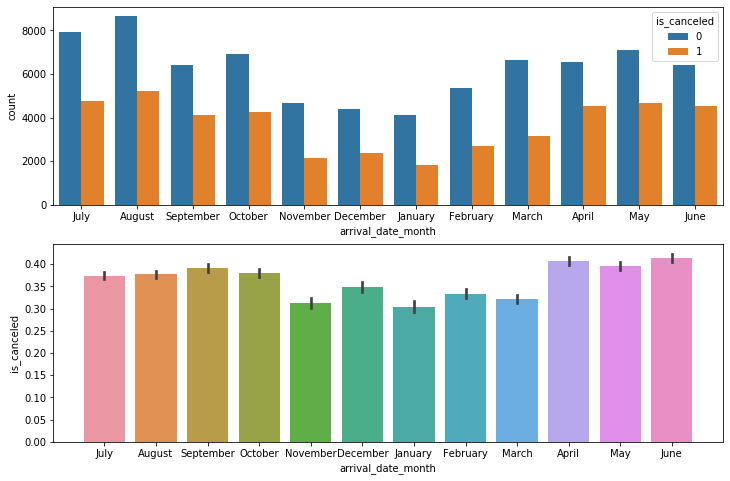

In [15]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.countplot('arrival_date_month',data=data,hue='is_canceled')
plt.subplot(2,1,2)
sns.barplot(x='arrival_date_month',data=data,y='is_canceled')
plt.plot()

### 5. stays_in_weekend_nights

In [16]:
data.groupby(['is_canceled'])['stays_in_weekend_nights'].value_counts()

is_canceled  stays_in_weekend_nights
0            0                          32497
             2                          20823
             1                          19619
             4                           1257
             3                            815
             6                             66
             5                             36
             8                             26
             7                              5
             10                             5
             9                              4
             12                             4
             13                             3
             14                             2
             16                             2
             18                             1
             19                             1
1            0                          19501
             2                          12485
             1                          11007
             4                            5

[]

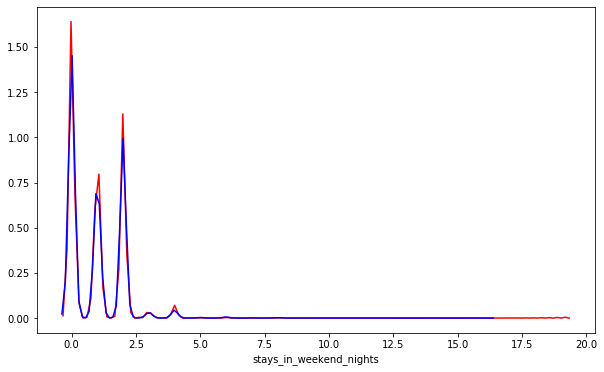

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(data[data['is_canceled']==0]['stays_in_weekend_nights'],hist=False,color='red')
sns.distplot(data[data['is_canceled']==1]['stays_in_weekend_nights'],hist=False,color='blue')
plt.plot()

In [18]:
## Max people are from 0-2 night of stay

## 6.stays_in_week_nights            

In [19]:
data.groupby(['is_canceled'])['stays_in_week_nights'].value_counts()

is_canceled  stays_in_week_nights
0            1                       20479
             2                       18810
             3                       13753
             5                        7216
             4                        6068
             0                        5732
             6                         917
             10                        741
             7                         706
             8                         436
             9                         136
             15                         42
             20                         24
             11                         21
             12                         19
             13                         16
             19                         15
             25                          6
             16                          5
             14                          4
             21                          4
             30                          4
             17     

[]

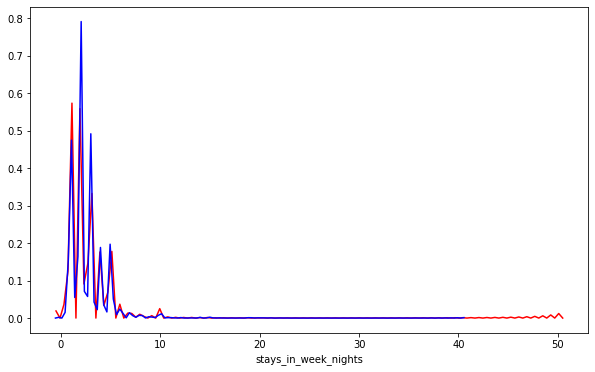

In [20]:
plt.figure(figsize=(10,6))
sns.distplot(data[data['is_canceled']==0]['stays_in_week_nights'],hist=False,color='red')
sns.distplot(data[data['is_canceled']==1]['stays_in_week_nights'],hist=False,color='blue')
plt.plot()

## Max people stayed from 0-5 week nights as the nights increase so the count decreases

### 7. adults 

In [21]:
data.groupby(['is_canceled'])['adults'].value_counts()

is_canceled  adults
0            2         54422
             1         16353
             3          4051
             0           294
             4            46
1            2         35258
             1          6674
             3          2151
             0           109
             4            16
             26            5
             5             2
             20            2
             27            2
             6             1
             10            1
             40            1
             50            1
             55            1
Name: adults, dtype: int64

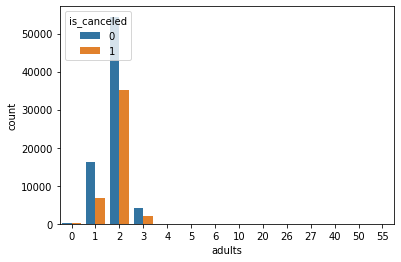

In [22]:
sns.countplot('adults',data=data,hue='is_canceled')

### 8. Children

In [23]:
data.groupby(['is_canceled'])['children'].value_counts()

is_canceled  children
0            0.0         69702
             1.0          3294
             2.0          2111
             3.0            59
1            0.0         41094
             1.0          1567
             2.0          1541
             3.0            17
             10.0            1
Name: children, dtype: int64

In [24]:
##  0 is max count so let us fill null value of children with 0
data.children.fillna(0,inplace=True)

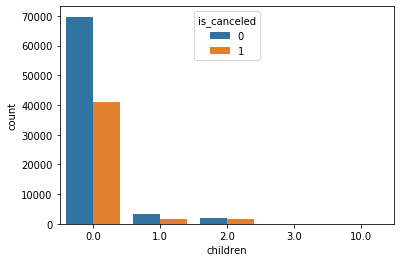

In [25]:
sns.countplot('children',data=data,hue='is_canceled')

### 9. Babies

In [26]:
data.groupby(['is_canceled'])['babies'].value_counts()

is_canceled  babies
0            0         74416
             1           735
             2            13
             9             1
             10            1
1            0         44057
             1           165
             2             2
Name: babies, dtype: int64

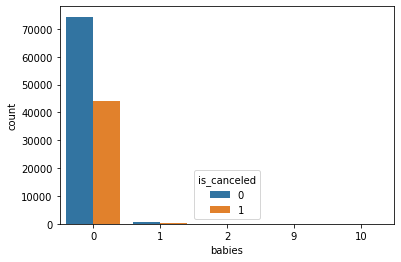

In [27]:

sns.countplot('babies',data=data,hue='is_canceled')


### Let us combine Adults, Children and Babies to one family


In [28]:
def family(df):
    if((df.adults>0) & (df.children>0)):
        fam= 1
    elif((df.adults>0) & (df.babies>0)):
        fam= 1
    else:
        fam= 0
    return fam

        

In [29]:
data['family']=data.apply(family,axis=1)

In [30]:
data['family'].value_counts()

0    110281
1      9109
Name: family, dtype: int64

In [31]:
data['total_customers']=data.adults+data.children+data.babies

## Now we can delete the adults children babies as we have combined them in single column

In [32]:
data.drop(['adults','children','babies'], axis=1, inplace=True)

### 10.Meal

In [33]:
data.groupby(['is_canceled'])['meal'].value_counts()

is_canceled  meal     
0            BB           57800
             HB            9479
             SC            6684
             Undefined      883
             FB             320
1            BB           34510
             HB            4984
             SC            3966
             FB             478
             Undefined      286
Name: meal, dtype: int64

[]

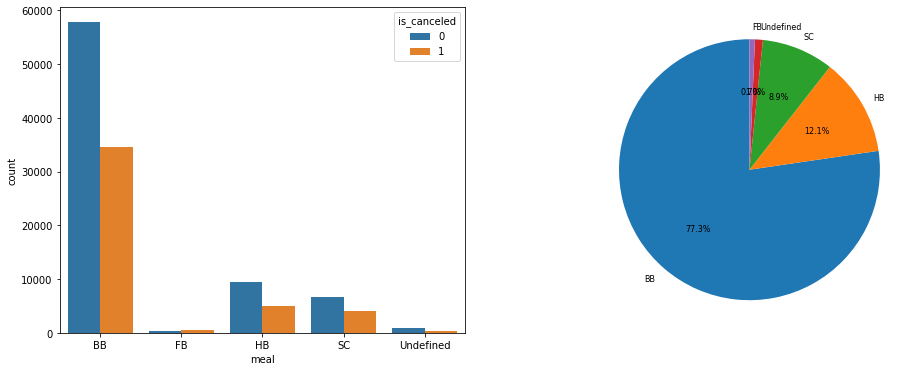

In [34]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot('meal',data=data,hue='is_canceled')
plt.subplot(1,2,2)
temp = data["meal"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.pie(df['values'], labels=df['labels'], textprops={'fontsize': 8}, startangle=90, 
       autopct='%1.01f%%')
plt.plot()

### 11.Country

In [35]:
data.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MRT        1
BDI        1
PLW        1
SMR        1
UMI        1
Name: country, Length: 177, dtype: int64

[]

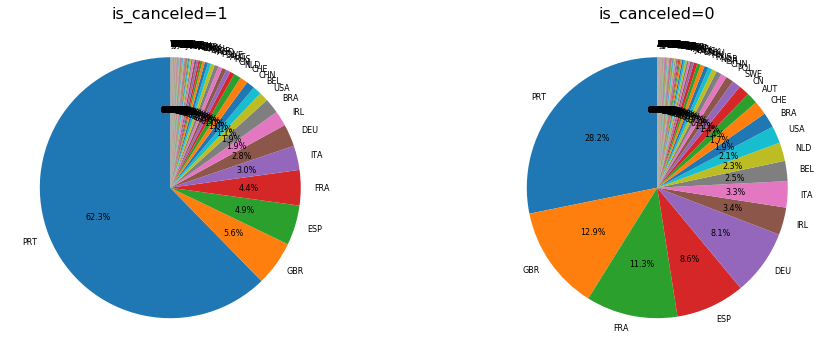

In [36]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
temp = data[data['is_canceled']==1]["country"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.pie(df['values'], labels=df['labels'], textprops={'fontsize': 8}, startangle=90, 
       autopct='%1.01f%%')
plt.title('is_canceled=1',fontsize=16)

plt.subplot(1,2,2)
temp = data[data['is_canceled']==0]["country"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.pie(df['values'], labels=df['labels'], textprops={'fontsize': 8}, startangle=90, 
       autopct='%1.01f%%')
plt.title('is_canceled=0',fontsize=16)
plt.plot()

In [37]:
data.country.isnull().sum()

488

In [38]:
data.country.fillna('PRT', inplace=True)

In [39]:
data.country.value_counts()[:15]

PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
Name: country, dtype: int64

## 12.market_segment

In [40]:
data.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

[]

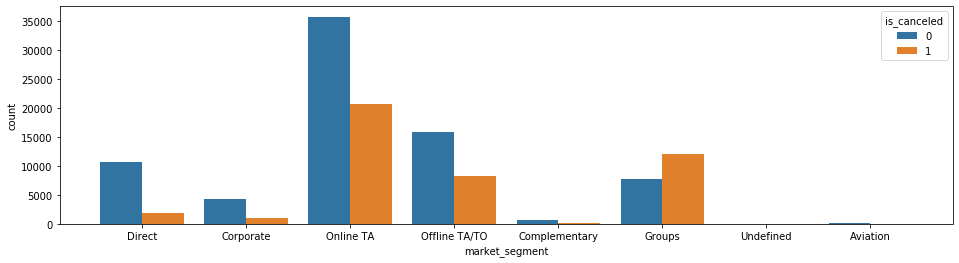

In [41]:
plt.figure(figsize=(16,4))
sns.countplot('market_segment',data=data,hue='is_canceled')
plt.plot()

### 13. distribution_channel 

In [42]:
data.distribution_channel.value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

[]

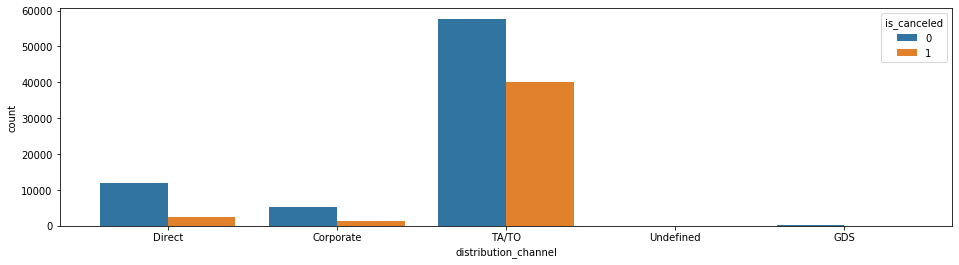

In [43]:
plt.figure(figsize=(16,4))
sns.countplot('distribution_channel',data=data,hue='is_canceled')
plt.plot()

### 14. is_repeated_guest

In [44]:
data.groupby(['is_canceled'])['is_repeated_guest'].value_counts()

is_canceled  is_repeated_guest
0            0                    71908
             1                     3258
1            0                    43672
             1                      552
Name: is_repeated_guest, dtype: int64

[]

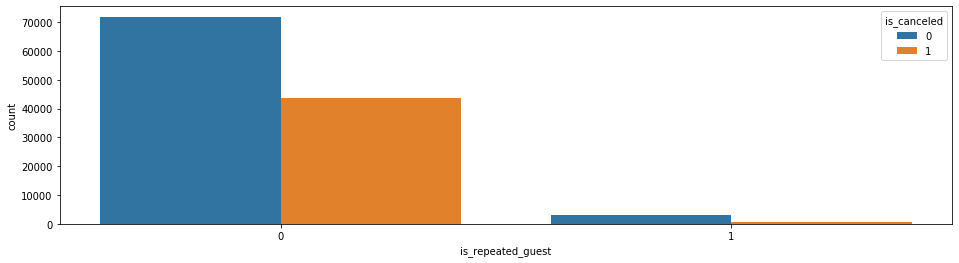

In [45]:
plt.figure(figsize=(16,4))
sns.countplot('is_repeated_guest',data=data,hue='is_canceled')
plt.plot()

### 15. previous_cancellations

In [46]:
data.groupby(['is_canceled'])['previous_cancellations'].value_counts()

is_canceled  previous_cancellations
0            0                         74624
             1                           337
             2                            78
             3                            45
             11                           25
             4                            24
             5                            17
             6                            15
             13                            1
1            0                         38282
             1                          5714
             24                           48
             2                            38
             26                           26
             25                           25
             3                            20
             19                           19
             14                           14
             13                           11
             11                           10
             4                             7
             6     

[]

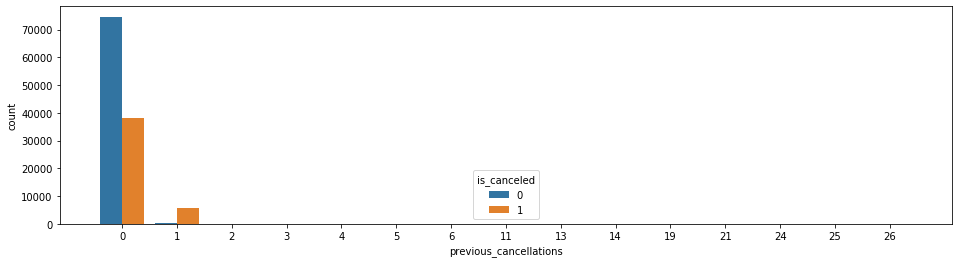

In [47]:
plt.figure(figsize=(16,4))
sns.countplot('previous_cancellations',data=data,hue='is_canceled')
plt.plot()

In [48]:
## we can convert previous_cancellations as yes or no
data['previous_cancellations']=np.where(data['previous_cancellations']>0,'Yes','No')

In [49]:
data['previous_cancellations'].value_counts()

No     112906
Yes      6484
Name: previous_cancellations, dtype: int64

### 16.reserved_room_type

In [50]:
data.groupby(['is_canceled'])['reserved_room_type'].value_counts()

is_canceled  reserved_room_type
0            A                     52364
             D                     13099
             E                      4621
             F                      2017
             G                      1331
             B                       750
             C                       624
             H                       356
             L                         4
1            A                     33630
             D                      6102
             E                      1914
             F                       880
             G                       763
             B                       368
             C                       308
             H                       245
             P                        12
             L                         2
Name: reserved_room_type, dtype: int64

[]

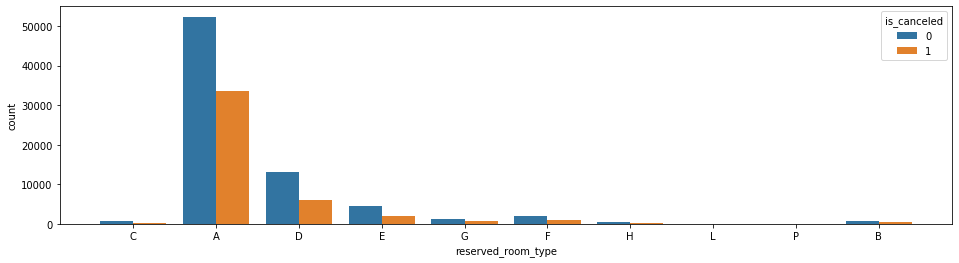

In [51]:
plt.figure(figsize=(16,4))
sns.countplot('reserved_room_type',data=data,hue='is_canceled')
plt.plot()

### 17.assigned_room_type

In [52]:
data.groupby(['is_canceled'])['assigned_room_type'].value_counts()

is_canceled  assigned_room_type
0            A                     41105
             D                     18960
             E                      5838
             F                      2824
             C                      1929
             G                      1773
             B                      1651
             H                       461
             I                       358
             K                       267
1            A                     32948
             D                      6362
             E                      1968
             F                       927
             G                       780
             B                       512
             C                       446
             H                       251
             K                        12
             P                        12
             I                         5
             L                         1
Name: assigned_room_type, dtype: int64

[]

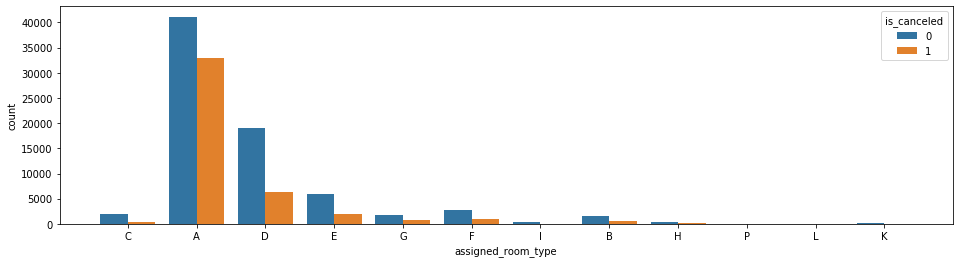

In [53]:
plt.figure(figsize=(16,4))
sns.countplot('assigned_room_type',data=data,hue='is_canceled')
plt.plot()

### 18.booking_changes

In [54]:
data['booking_changes'].value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
11         2
12         2
16         2
17         2
20         1
18         1
21         1
Name: booking_changes, dtype: int64

### 19.deposit_type

In [55]:
data.groupby(['is_canceled'])['deposit_type'].value_counts()

is_canceled  deposit_type
0            No Deposit      74947
             Refundable        126
             Non Refund         93
1            No Deposit      29694
             Non Refund      14494
             Refundable         36
Name: deposit_type, dtype: int64

[]

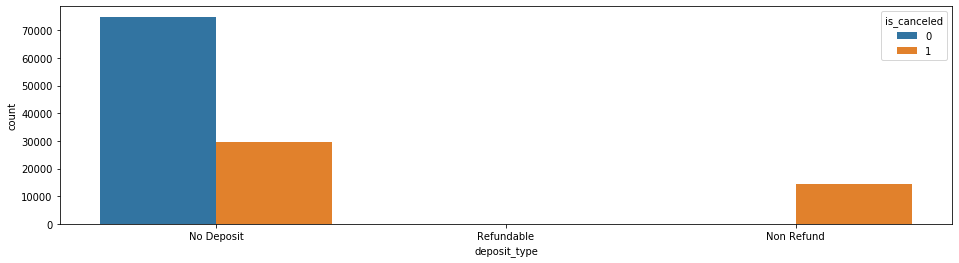

In [56]:
plt.figure(figsize=(16,4))
sns.countplot('deposit_type',data=data,hue='is_canceled')
plt.plot()

### 20. agent

In [57]:
data.agent.value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

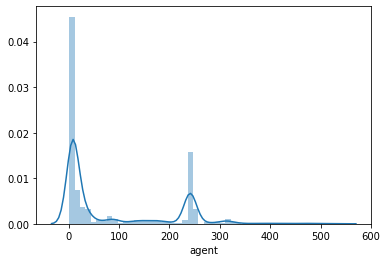

In [58]:
sns.distplot(data['agent'])

### 21 days_in_waiting_list

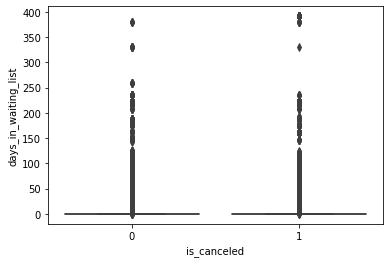

In [59]:
sns.boxplot(x='is_canceled',y='days_in_waiting_list',data=data)

### 22 customer_type

In [60]:
data.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

[]

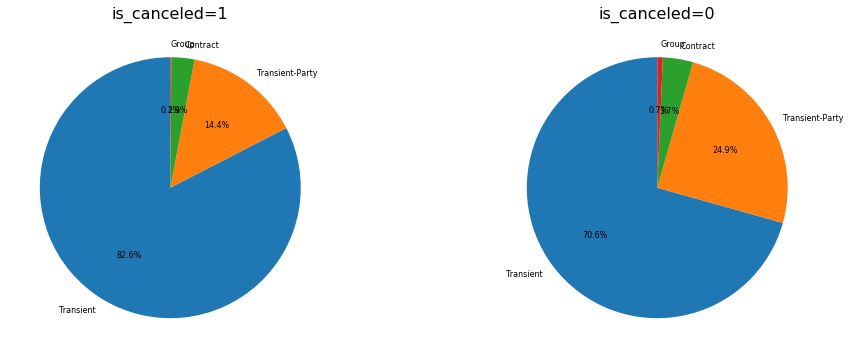

In [61]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
temp = data[data['is_canceled']==1]["customer_type"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.pie(df['values'], labels=df['labels'], textprops={'fontsize': 8}, startangle=90, 
       autopct='%1.01f%%')
plt.title('is_canceled=1',fontsize=16)

plt.subplot(1,2,2)
temp = data[data['is_canceled']==0]["customer_type"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.pie(df['values'], labels=df['labels'], textprops={'fontsize': 8}, startangle=90, 
       autopct='%1.01f%%')
plt.title('is_canceled=0',fontsize=16)
plt.plot()

### 23. adr

[]

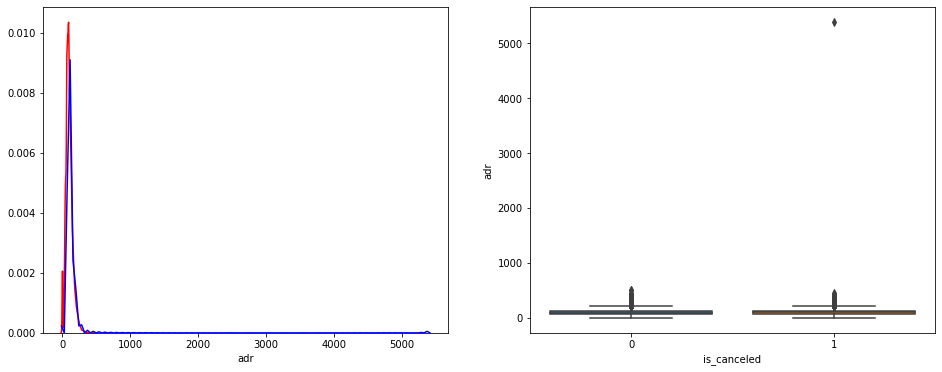

In [62]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(data[data['is_canceled']==0]['adr'],hist=False,color='red')
sns.distplot(data[data['is_canceled']==1]['adr'],hist=False,color='blue')
plt.subplot(1,2,2)
sns.boxplot(x='is_canceled',y='adr',data=data)
plt.plot()

### 24  required_car_parking_spaces

In [63]:
data.groupby(['is_canceled'])['required_car_parking_spaces'].value_counts()

is_canceled  required_car_parking_spaces
0            0                              67750
             1                               7383
             2                                 28
             3                                  3
             8                                  2
1            0                              44224
Name: required_car_parking_spaces, dtype: int64

[]

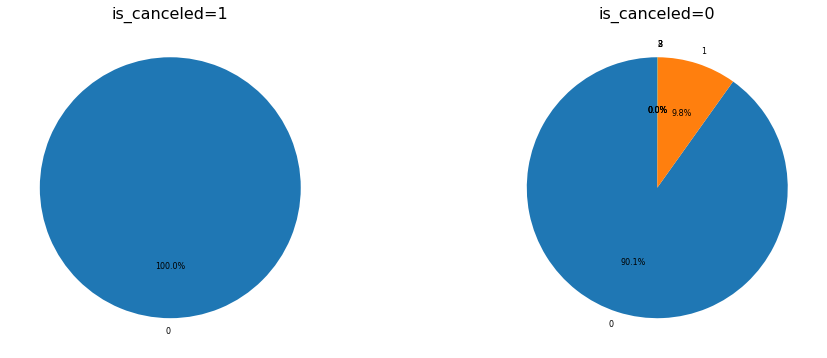

In [64]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
temp = data[data['is_canceled']==1]["required_car_parking_spaces"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.pie(df['values'], labels=df['labels'], textprops={'fontsize': 8}, startangle=90, 
       autopct='%1.01f%%')
plt.title('is_canceled=1',fontsize=16)

plt.subplot(1,2,2)
temp = data[data['is_canceled']==0]["required_car_parking_spaces"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.pie(df['values'], labels=df['labels'], textprops={'fontsize': 8}, startangle=90, 
       autopct='%1.01f%%')
plt.title('is_canceled=0',fontsize=16)
plt.plot()

### 25. total_of_special_requests

In [65]:
data.groupby(['is_canceled'])['total_of_special_requests'].value_counts()

is_canceled  total_of_special_requests
0            0                            36762
             1                            25908
             2                            10103
             3                             2051
             4                              304
             5                               38
1            0                            33556
             1                             7318
             2                             2866
             3                              446
             4                               36
             5                                2
Name: total_of_special_requests, dtype: int64

[]

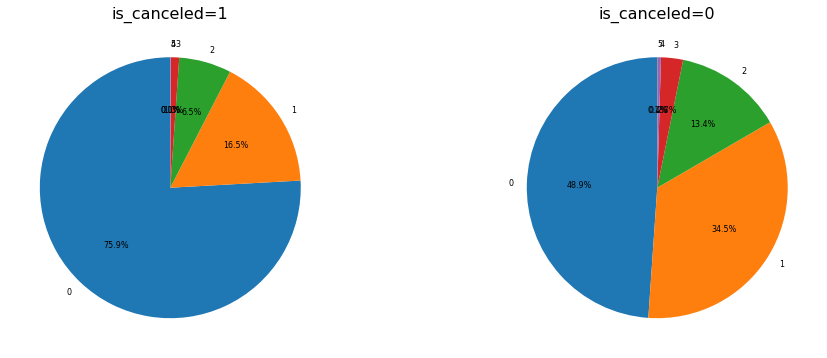

In [66]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
temp = data[data['is_canceled']==1]["total_of_special_requests"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.pie(df['values'], labels=df['labels'], textprops={'fontsize': 8}, startangle=90, 
       autopct='%1.01f%%')
plt.title('is_canceled=1',fontsize=16)

plt.subplot(1,2,2)
temp = data[data['is_canceled']==0]["total_of_special_requests"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.pie(df['values'], labels=df['labels'], textprops={'fontsize': 8}, startangle=90, 
       autopct='%1.01f%%')
plt.title('is_canceled=0',fontsize=16)
plt.plot()

### 26. reservation_status

In [67]:
data.groupby(['is_canceled'])['reservation_status'].value_counts()

is_canceled  reservation_status
0            Check-Out             75166
1            Canceled              43017
             No-Show                1207
Name: reservation_status, dtype: int64

In [68]:
data.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

### reservation status is just the sum of is_canceled so can be removed

In [69]:
data.drop('reservation_status', axis=1 , inplace=True)

### As we alreday have Month so we can remove week number 

In [70]:
data.drop('arrival_date_week_number', axis=1 , inplace=True)

In [71]:
data.drop('reservation_status_date',axis=1, inplace=True)

### Let us remove Agent also for now as 16340 null values are present and also there are lot of agents so we can try to remove and check once

In [72]:
data.drop('agent', axis=1 , inplace=True)

### Now our data set is cleaned with 0 null values

## Feature Selection 

### Cheking Correlation

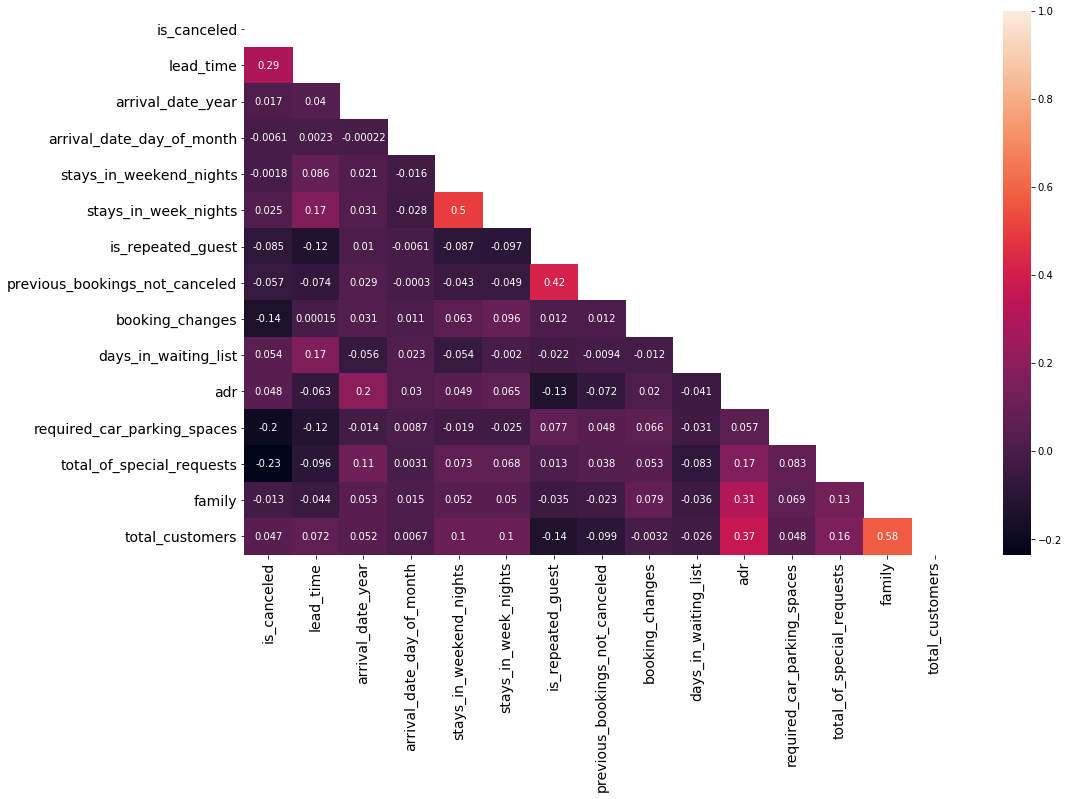

In [73]:
mask=np.zeros_like(data.corr())
indent=np.triu_indices_from(mask)
mask[indent]=True
plt.figure(figsize=[16,10])
sns.heatmap(data.corr(),annot=True,mask=mask, annot_kws={"size":10})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### arrival_date_day_of_month  and  stays_in_weekend_nights  is very less correlated to is_cancelled so we can remove and try once

In [74]:
data.drop(['arrival_date_day_of_month', 'stays_in_weekend_nights'],axis=1, inplace=True)

### Family with Total Customers 
### Is repeated guest with Total booking not cancelled have correlation more than 0.50 but not too high also

We can remove them but for now let us keep and check

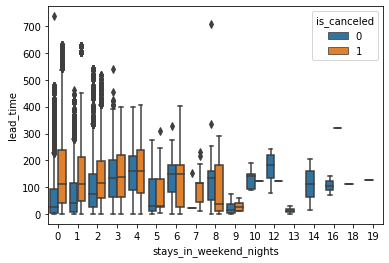

In [26]:
sns.boxplot(x='stays_in_weekend_nights', y='lead_time',hue='is_canceled',data=data)


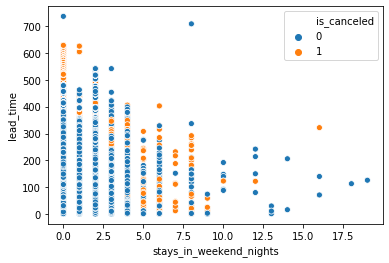

In [4]:
sns.scatterplot(data=data,x="stays_in_weekend_nights",y= "lead_time",hue='is_canceled')

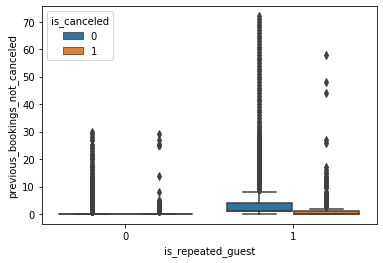

In [78]:
sns.boxplot(x='is_repeated_guest', y='previous_bookings_not_canceled',hue='is_canceled',data=data)

As the stay in weekend night increases the lead time decreases and also the cancellation decrease

### Setting the list of numeric and categorial values saperatly

In [81]:
category_col=data.select_dtypes(include=['object']).columns
numeric_col=data.select_dtypes(include=['number']).columns

In [91]:
numeric_col

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'family',
       'total_customers'],
      dtype='object')

In [82]:
df=data.copy()

### Checking for unique values of object features

In [83]:
cat_ser=pd.Series(index=category_col)
for i in category_col:
    cat_ser[i]=data[i].nunique()

D:\Installation\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [84]:
cat_ser

hotel                       2.0
arrival_date_month         12.0
meal                        5.0
country                   177.0
market_segment              8.0
distribution_channel        5.0
previous_cancellations      2.0
reserved_room_type         10.0
assigned_room_type         12.0
deposit_type                3.0
customer_type               4.0
dtype: float64

### For features with greater than 5 option we will use label encoding and for features less than 5 we will use on hot encoding and for arrival_date_month we will do manually as using label encoder it migth set diff labels

In [85]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [86]:
months={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,
        'August':8,'September':9,'October':10,'November':11,'December':12}
df['arrival_date_month'].replace(months,inplace=True)

In [87]:
lab= LabelEncoder()
col_count=0
for i in df:
    if (df[i].dtype=='O' and (df[i].nunique()==2 or df[i].nunique()>5 )):
        if df[i].isnull().any()==False:
            lab.fit(df[i])
            df[i]=lab.transform(df[i])
            print(i)
            col_count+=1
            
print("total_columns updated",col_count)

hotel
country
market_segment
previous_cancellations
reserved_room_type
assigned_room_type
total_columns updated 6


In [88]:
df=pd.get_dummies(df)

### Saperating the data set in test and train

In [111]:
X=df.drop('is_canceled',axis=1)
y=df['is_canceled']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((79991, 36), (39399, 36), (79991,), (39399,))

In [90]:
y_train.value_counts()

0    50412
1    29579
Name: is_canceled, dtype: int64

In [91]:
### Creating function for different model testing
def model_selection(model,X_train,X_test,y_train,y_test):
    algo=model
    algo.fit(X_train,y_train)
    algo_predict=algo.predict(X_test)
    cm_algo = confusion_matrix(y_test, algo_predict)
    algo_acc = accuracy_score(y_test, algo_predict)
    print("Model :" ,model)
    print('Validation Results')
    print("Recall score ",recall_score(y_test, algo_predict))
    print("F1 score",f1_score(y_test, algo_predict))
    print("roc auc score",roc_auc_score(y_test, algo_predict))
    print("Precision Score",precision_score(y_test, algo_predict))
    print("Accuracy score : ",algo_acc)
    
    sns.heatmap(cm_algo,annot=True)

Using LogisticRegression
Model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Validation Results
0.8032944998604026
Recall score  0.598019801980198
F1 score 0.6932636745032851
roc auc score 0.7613796190154687
Precision Score 0.8245927878730817
Accuracy score :  0.8032944998604026


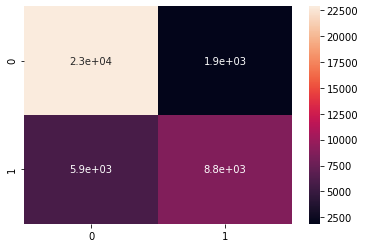

In [113]:
print("Using LogisticRegression")
model_selection(LogisticRegression(solver = "liblinear"), X_train, X_test, y_train, y_test)

Using Lasso LogisticRegression
Model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Validation Results
0.8031422117312622
Recall score  0.601775349948788
F1 score 0.6944291230005516
roc auc score 0.7620252688986083
Precision Score 0.8208065567663221
Accuracy score :  0.8031422117312622


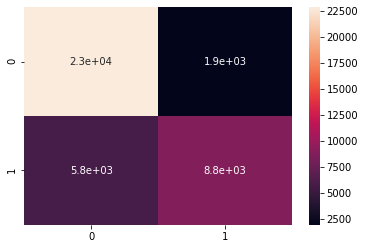

In [114]:
print("Using Lasso LogisticRegression")
model_selection(LogisticRegression(penalty='l1',solver = "liblinear"), X_train, X_test, y_train, y_test)

Using K=Nearesrt Neighbour
Model : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Validation Results
0.793928779918272
Recall score  0.6768863093205872
F1 score 0.7094650205761316
roc auc score 0.7700299689125357
Precision Score 0.7453383458646616
Accuracy score :  0.793928779918272


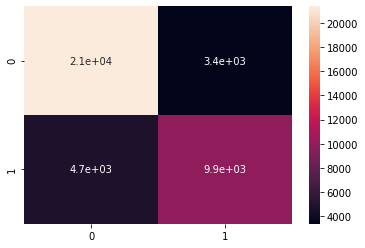

In [115]:
print("Using K=Nearesrt Neighbour")
model_selection(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

SVC was taking too much time so could not run 

print("Using SVC ")
model_selection(SVC(kernel='rbf'), X_train, X_test, y_train, y_test)

print("Using SVC ")
model_selection(SVC(kernel='linear'), X_train, X_test, y_train, y_test)

Decision Tree criterion - entropy 
Model : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Validation Results
0.8484986928602248
Recall score  0.800614544213042
F1 score 0.7971039124375404
roc auc score 0.8387212658045092
Precision Score 0.7936239339379992
Accuracy score :  0.8484986928602248


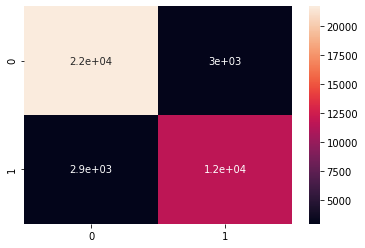

In [116]:
print("Decision Tree criterion - entropy ")
model_selection(DecisionTreeClassifier(criterion = 'entropy'), X_train, X_test, y_train, y_test)

Decision Tree criterion - gini 
Model : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Validation Results
0.8476357267950964
Recall score  0.8023898941618299
F1 score 0.7965429588205388
roc auc score 0.8383970154335043
Precision Score 0.7907806191117093
Accuracy score :  0.8476357267950964


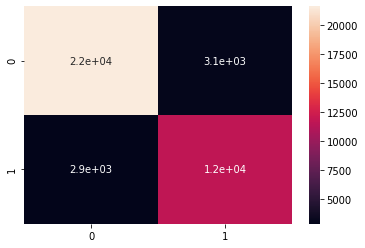

In [117]:
print("Decision Tree criterion - gini ")
model_selection(DecisionTreeClassifier(criterion = 'gini'), X_train, X_test, y_train, y_test)

Random Forest 
Model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Validation Results
0.8862661488870276
Recall score  0.802799590303858
F1 score 0.8399357028040721
roc auc score 0.8692231772315929
Precision Score 0.8806741573033708
Accuracy score :  0.8862661488870276


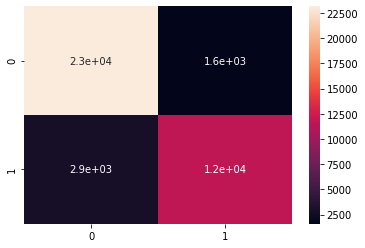

In [118]:
print("Random Forest ")
model_selection(RandomForestClassifier(), X_train, X_test, y_train, y_test)

### As of now random forest is giving the best results let us check for the important features and also best params for random forest

In [92]:
## Cheking for top features slected using Random forest 
ran_forest=RandomForestClassifier()
ran_forest.fit(X_train,y_train)
ran_forest.predict(X_test)




,Variables,Features
1,lead_time,0.152587
5,country,0.114802
14,adr,0.106021
30,deposit_type_Non Refund,0.088591
29,deposit_type_No Deposit,0.081597
16,total_of_special_requests,0.057736
3,arrival_date_month,0.056445
6,market_segment,0.049575
4,stays_in_week_nights,0.048895
8,previous_cancellations,0.030969


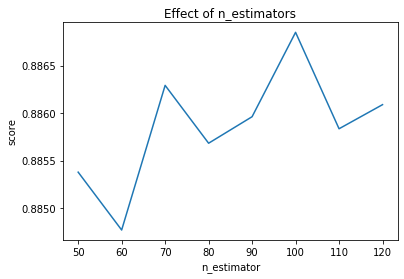

In [140]:
random_forest = RandomForestClassifier()
estimators = np.arange(50, 130, 10)
scores = []
for n in estimators:
    random_forest.set_params(n_estimators=n)
    random_forest.fit(X_train, y_train)
    scores.append(random_forest.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

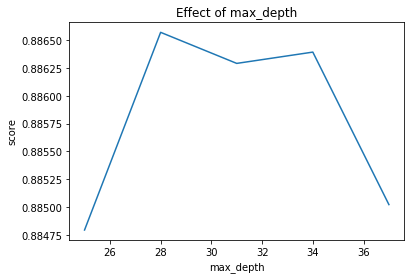

In [143]:
random_forest = RandomForestClassifier()
depths=np.arange(25, 40, 3)
scores = []
for dep in depths:
    random_forest.set_params(n_estimators=100,max_depth=dep)
    random_forest.fit(X_train, y_train)
    scores.append(random_forest.score(X_test, y_test))
plt.title("Effect of max_depth")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.plot(depths, scores)

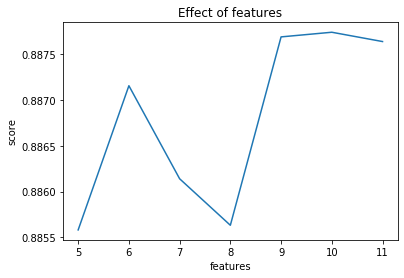

In [145]:
random_forest = RandomForestClassifier()
features = np.arange(5, 12, 1)
scores = []
for feature in features:
    random_forest.set_params(n_estimators=100,max_depth=28,max_features=feature)
    random_forest.fit(X_train, y_train)
    scores.append(random_forest.score(X_test, y_test))
plt.title("Effect of features")
plt.xlabel("features")
plt.ylabel("score")
plt.plot(features, scores)

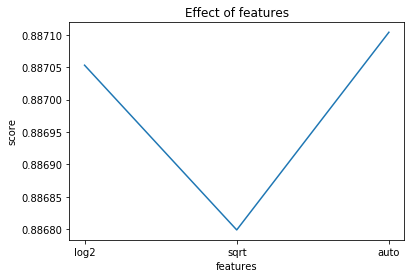

In [146]:
random_forest = RandomForestClassifier()
features = ['log2', 'sqrt','auto']
scores = []
for feature in features:
    random_forest.set_params(n_estimators=100,max_depth=31,max_features=feature)
    random_forest.fit(X_train, y_train)
    scores.append(random_forest.score(X_test, y_test))
plt.title("Effect of features")
plt.xlabel("features")
plt.ylabel("score")
plt.plot(features, scores)

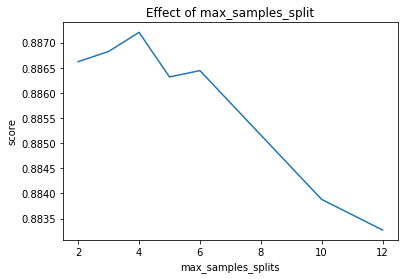

In [148]:
samples_splits=[2,3,4,5,6,10,12]
random_forest = RandomForestClassifier()
scores = []
for sample in samples_splits:
    random_forest.set_params(n_estimators=100,max_depth=31,max_features=10,min_samples_split=sample)
    random_forest.fit(X_train, y_train)
    scores.append(random_forest.score(X_test, y_test))
plt.title("Effect of max_samples_split")
plt.xlabel("max_samples_splits")
plt.ylabel("score")
plt.plot(samples_splits, scores)

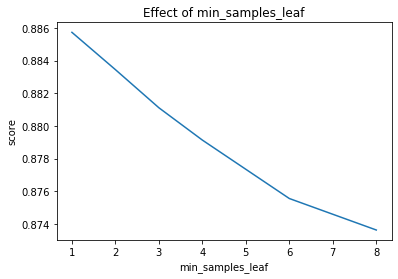

In [150]:
samples_leaf=[1,2,3,4,6,8]
random_forest = RandomForestClassifier()
scores = []
for leaf in samples_leaf:
    random_forest.set_params(n_estimators=58,max_depth=28,max_features=10,min_samples_split=4,min_samples_leaf=leaf)
    random_forest.fit(X_train, y_train)
    scores.append(random_forest.score(X_test, y_test))
plt.title("Effect of min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("score")
plt.plot(samples_leaf, scores)

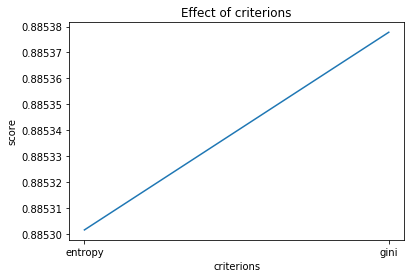

In [151]:
criterions= ['entropy', 'gini']
random_forest = RandomForestClassifier()
scores = []
for criterion in criterions:
    random_forest.set_params(n_estimators=58,max_depth=28,max_features=10,min_samples_split=4,min_samples_leaf=1,criterion=criterion)
    random_forest.fit(X_train, y_train)
    scores.append(random_forest.score(X_test, y_test))
plt.title("Effect of criterions")
plt.xlabel("criterions")
plt.ylabel("score")
plt.plot(criterions, scores)

params = {'n_estimators': [80,100,120], 
              'max_features': [9,10,11,12], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [10,20,25,28,30], 
              'min_samples_split': [2, 3,4,5],
              'min_samples_leaf': [1,5,8]
             }
random_forest = RandomForestClassifier()
model = GridSearchCV(random_forest, param_grid=params)
res=model.fit(X_train,y_train)

In [ ]:
df.columns

Model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=28, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=58,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Validation Results
Recall score  0.804984636394674
F1 score 0.8399116557423767
roc auc score 0.8694067562679518
Precision Score 0.8780070008192448
Accuracy score :  0.8859361912738902


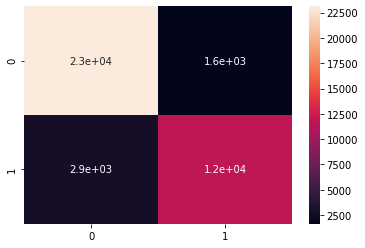

In [114]:
random_forest=RandomForestClassifier(n_estimators=58,max_depth=28,max_features=10,min_samples_split=4,min_samples_leaf=1,criterion='gini')
random_forest.fit(X_train,y_train)
y_predict=random_forest.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_predict)
acc_score = accuracy_score(y_test, y_predict)
print("Model :" ,random_forest)
print('Validation Results')
print("Recall score ",recall_score(y_test, y_predict))
print("F1 score",f1_score(y_test, y_predict))
print("roc auc score",roc_auc_score(y_test, y_predict))
print("Precision Score",precision_score(y_test, y_predict))
print("Accuracy score : ",acc_score)
sns.heatmap(conf_matrix,annot=True)

In [120]:
kfold = KFold(n_splits=10, random_state=100)
model_kfold = RandomForestClassifier(n_estimators=58,max_depth=28,max_features=10,min_samples_split=4,min_samples_leaf=1,criterion='gini')
results_kfold = cross_val_score(model_kfold,X_train, y_train, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 88.14%


In [121]:
results_kfold

array([0.880125  , 0.87685961, 0.87735967, 0.87635954, 0.88536067,
       0.88548569, 0.88348544, 0.88573572, 0.8816102 , 0.88173522])

In [122]:
feature_sel=pd.DataFrame({'Variables':X_train.columns,'Features':random_forest.feature_importances_})
feature_sel.sort_values(by='Features',ascending=False,inplace=True)
feature_sel

,Variables,Features
1,lead_time,0.144135
5,country,0.110314
30,deposit_type_Non Refund,0.107600
14,adr,0.093148
29,deposit_type_No Deposit,0.092422
16,total_of_special_requests,0.060392
6,market_segment,0.058756
3,arrival_date_month,0.047115
4,stays_in_week_nights,0.039988
8,previous_cancellations,0.032995


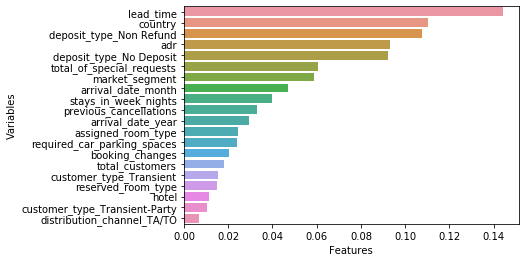

In [138]:
sns.barplot(x='Features',y='Variables',data=feature_sel[:20])

## Evaluating with top 20 features

In [132]:
feature_sel[:20].Variables.values

array(['lead_time', 'country', 'deposit_type_Non Refund', 'adr',
       'deposit_type_No Deposit', 'total_of_special_requests',
       'market_segment', 'arrival_date_month', 'stays_in_week_nights',
       'previous_cancellations', 'arrival_date_year',
       'assigned_room_type', 'required_car_parking_spaces',
       'booking_changes', 'total_customers', 'customer_type_Transient',
       'reserved_room_type', 'hotel', 'customer_type_Transient-Party',
       'distribution_channel_TA/TO'], dtype=object)

In [133]:
X_selcted=X[['lead_time', 'country', 'deposit_type_Non Refund', 'adr',
       'deposit_type_No Deposit', 'total_of_special_requests',
       'market_segment', 'arrival_date_month', 'stays_in_week_nights',
       'previous_cancellations', 'arrival_date_year',
       'assigned_room_type', 'required_car_parking_spaces',
       'booking_changes', 'total_customers', 'customer_type_Transient',
       'reserved_room_type', 'hotel', 'customer_type_Transient-Party',
       'distribution_channel_TA/TO']]

In [134]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_selcted, y, test_size=0.33, random_state=42)
X_train_new.shape , X_test_new.shape ,y_train_new.shape ,y_test_new.shape

((79991, 20), (39399, 20), (79991,), (39399,))

Model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=28, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=58,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Validation Results
Recall score  0.8077159440081939
F1 score 0.8380149481066912
roc auc score 0.868368758139671
Precision Score 0.8706756955689681
Accuracy score :  0.8839310642402092
Sensitivity score 0.8077159440081939
Specificity score 0.9290215722711481
[[22997  1757]
 [ 2816 11829]]


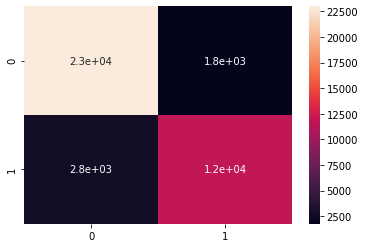

In [157]:
random_forest=RandomForestClassifier(n_estimators=58,max_depth=28,max_features=10,min_samples_split=4,min_samples_leaf=1,criterion='gini')
random_forest.fit(X_train_new,y_train_new)
y_predict=random_forest.predict(X_test_new)
conf_matrix = confusion_matrix(y_test_new, y_predict)
acc_score = accuracy_score(y_test_new, y_predict)
print("Model :" ,random_forest)
print('Validation Results')
print("Recall score ",recall_score(y_test_new, y_predict))
print("F1 score",f1_score(y_test_new, y_predict))
print("roc auc score",roc_auc_score(y_test_new, y_predict))
print("Precision Score",precision_score(y_test_new, y_predict))
print("Accuracy score : ",acc_score)
print("Sensitivity score",sensitivity_score(y_test, y_predict))
print("Specificity score",specificity_score(y_test, y_predict))
print(conf_matrix)
sns.heatmap(conf_matrix,annot=True)

In [159]:
false_pos=(y_test==0)&(y_predict==1)
false_pos.sum()

1757

In [160]:
true_pos=(y_test==1)&(y_predict==1)
true_pos.sum()

11829

In [162]:
true_neg=(y_test==0)&(y_predict==0)
true_neg.sum()

22997

In [163]:
false_neg=(y_test==1)&(y_predict==0)
false_neg.sum()

2816